In [5]:
import numpy as np
import matplotlib.pyplot as plt
import spaudiopy as spa
from pathlib import Path
import glob

In [6]:
# INPUT

# defining Parameters
N_sph = 1 # Ambisonics order
fs = 48000 #??

# input signal
file_path = '/Users/viautopia/Nextcloud/Applied Acoustics/A10p/HOA/' 

In [10]:
# loading signal 
in_path = glob.glob(file_path + '*.wav')
in_file= spa.io.load_audio(in_path)
in_sig = in_file.get_signals()

in_sig = in_sig[0:4,:]

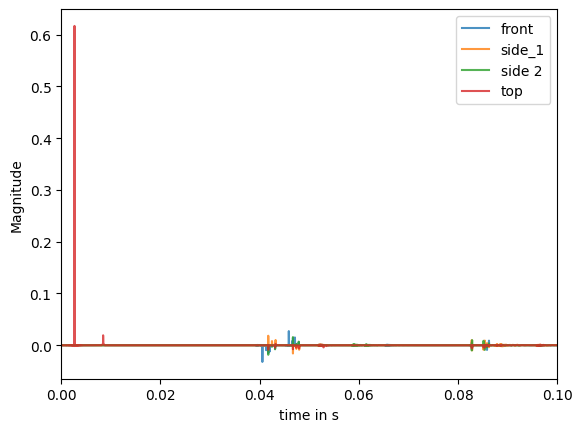

In [12]:
# defining steering directions of the beampattern
vec = np.array([[-1,0,0],[0,-1,0],[0,1,0],[0,0,1]]) #back, left, right, top

# conversion of vec: [x,y,z] to dir: [azi, zen]
dirs = spa.utils.vec2dir(vec) 

azi_steer = dirs[:,0]
zen_steer = dirs[:,1]

w_nm = spa.parsa.sh_beamformer_from_pattern('max_rE', N_sph,
                                          azi_steer, zen_steer)
x_nm = in_sig
y = spa.parsa.sh_beamform(w_nm, x_nm)

t = np.arange(len(y[0,:]))/fs

fig, ax = plt.subplots()
ax.plot(t, y[0,:], label = 'front', alpha=0.8)
ax.plot(t, y[1,:], label = 'side_1', alpha= 0.8)
ax.plot(t, y[2,:], label = 'side 2', alpha=0.8)
ax.plot(t, y[3,:], label = 'top', alpha=0.8)

plt.xlim(0,0.1)
plt.xlabel('time in s')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

In [19]:
# find sample with max amplitude for IR start
#max_sample = np.max(in_sig, axis= 1)
#idx_max_sample = np.argmax(in_sig, axis = 1)
#values, counts = np.unique(idx_max_sample, return_counts = True)

#ind_max_sample = values[counts.argmax()]
#IR_start = ind_max_sample

IR_start = 0

start_sample = 12e-3*fs + IR_start
duration = 50e-3*fs
end_sample = start_sample + duration

y_cutted = y[:,round(start_sample):round(end_sample)]

#back, left, right, top

top = np.sum(y_cutted[3,:])
left = np.sum(y_cutted[2,:])
right = np.sum(y_cutted[1,:])
back = np.sum(y_cutted[0,:])

In [20]:
# von Linus

# Beschreibung des Parameters

# TS - Top/Sides(left,right)

TS = 10*np.log10((top)**2/(left + right)**2)
print('TS = ' + str(TS))

# TH - Top/Horizontal(left,right,back)

TH = 10*np.log10((top)**2/(left + right + back)**2)
print('TH = ' + str(TH))

TS = 20.27018413468754
TH = 47.34311742267682
